**Exam Instructions**
- You are given 4 different tasks to complete.
- You have 1 hour and 15 minutes to submit the file to the HADI.
- You are free to use any python platform (colab, jupyter, visual-code, pycharm, etc.) you want to run the exam.
- The codes that do not work or give an error will not be assessed.
- All the WEB resources (lecture notes, html pages, youtube videos, even ChatGPT) are free to use.
- Talking or messaging with your friends will not be tolerated.The network traffic of the lab will be monitored.
- Submitting the correct file (notebook) in the correct format (.ipynb) is your responsibility.

Good Luck

In [ ]:
# Write your name and ID below
#
# NAME : Burak Üçüncü
# ID   : 2220674009
#
#

**TASK 1)(25 pts)**

* a)   Using the [Open Street Map Nominatim](https://nominatim.openstreetmap.org/ui/search.html) online map and OSMnx library, select **one** random neighborhood from Turkey's five big cities (Istanbul, Ankara, İzmir, Bursa, Adana) and retreive its street network as a graph.
* b)  Convert the graph to a geodataframe and find the total number of buildings within the neighborhood.
* c)  Find the total number of schools and mosques in the defined area.  
* d)  Place a polygon to this relevant neighborhood and find its area in square meters (you must use the correct EPSG ID based on your city selection - https://epsg.io/ for help.)
* e) Select two random locations from your area and plot the shortest route on a figure between these two locations.




In [19]:
import osmnx as ox
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point, Polygon
import numpy as np
import warnings
warnings.filterwarnings("ignore")

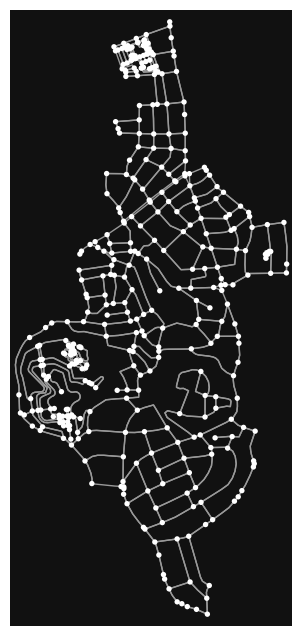

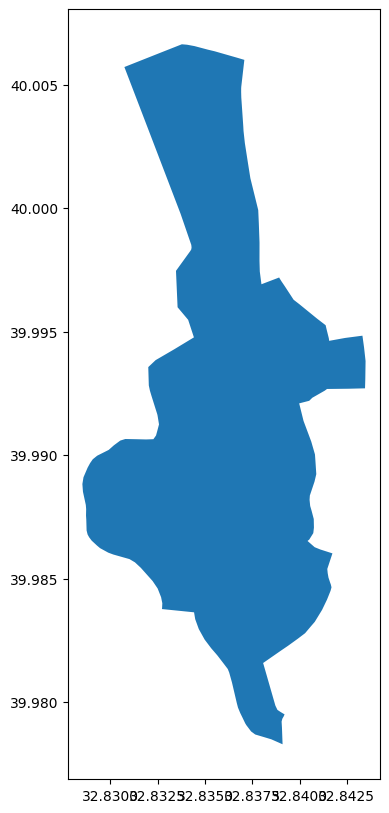

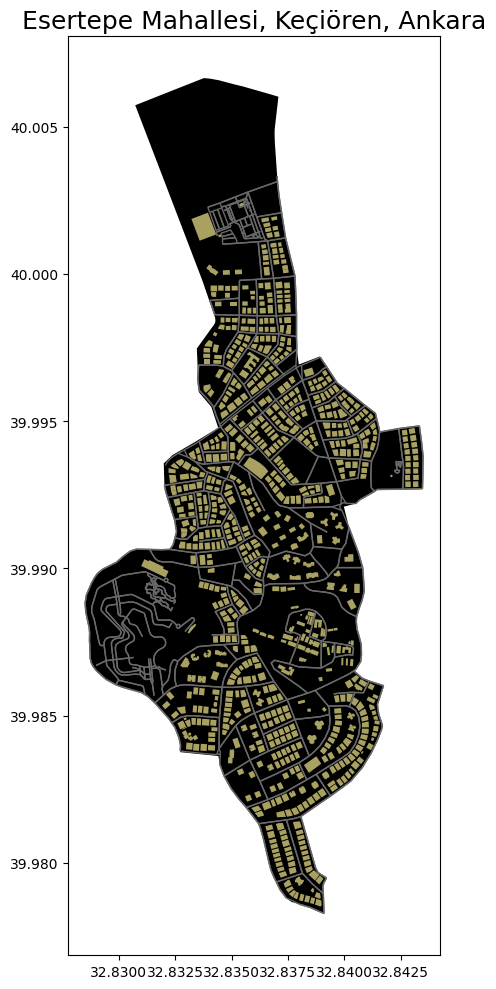

In [7]:
# Write your codes here
place_name = 'Esertepe Mahallesi, Keçiören, Ankara'
graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph)
nodes, edges = ox.graph_to_gdfs(graph)
area = ox.geocode_to_gdf(place_name)
area.plot(figsize=(10, 10))
tags = {'building': True}
buildings = ox.geometries_from_place(place_name, tags)

fig, ax = plt.subplots(figsize=(10, 10))
area.plot(ax=ax, facecolor='black')
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)
ax.set_title(place_name, fontsize=18)
plt.tight_layout()


In [11]:
# Write your codes here
gdf = ox.geocode_to_gdf(place_name)
buildings = ox.geometries_from_place(place_name, tags={'building': True})
total_buildings = len(buildings)
total_buildings

820

In [22]:
# Write your codes here
amenities = ox.geometries_from_place(place_name, tags={'amenity':['school', 'place_of_worship']})
total_schools = len(amenities[amenities['amenity'] == 'school'])
total_mosques = len(amenities[amenities['amenity'] == 'place_of_worship'])

In [23]:
# Write your codes here
print('Total number of schools:', total_schools)
print('Total number of mosques:', total_mosques)

Total number of schools: 3
Total number of mosques: 5


In [17]:
# Write your codes here
exterior_coords = gdf['geometry'].iloc[0].exterior.coords.xy
polygon = Polygon(zip(exterior_coords[0], exterior_coords[1]))
area = polygon.area
area

0.00019035430181001196

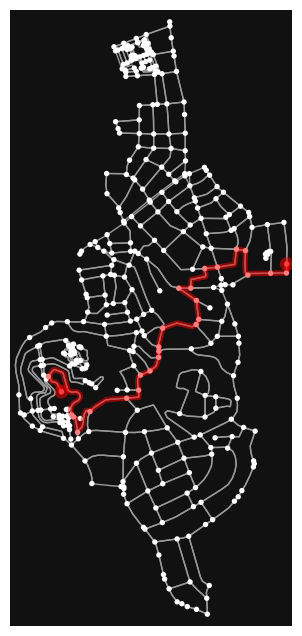

In [21]:
# Write your codes here
random_nodes = np.random.choice(graph.nodes, 2)
shortest_path = nx.shortest_path(graph, random_nodes[0], random_nodes[1])
fig, ax = ox.plot_graph_route(graph, shortest_path)

**TASK 2)(25 pts)**
Choose 5 shopping malls in Ankara and compute their distance from Hacettepe University Teknokent 5th R&D building in meters respectively. Use the geocoding library you saw in the lectures.

In [87]:
import geopy.distance

teknokent_coords = (39.86259, 32.73901)

shopping_malls = [
  ("Ankamall", (39.9511, 32.8314)),
  ("Cepa AVM", (39.91025, 32.77833)),
  ("Gordion AVM", (39.90075, 32.69118)),
  ("Kentpark AVM", (39.90980, 32.77643)),
  ("Taurus AVM", (39.88829, 32.81118))
]

distances = []
for name, coords in shopping_malls:
  distance = geopy.distance.distance(teknokent_coords, coords).m
  distances.append((name, distance))

for name, distance in distances:
  print(f"Distance from Teknokent to {name}: {distance:.2f} meters")

Distance from Teknokent to Ankamall: 12609.28 meters
Distance from Teknokent to Cepa AVM: 6270.14 meters
Distance from Teknokent to Gordion AVM: 5889.98 meters
Distance from Teknokent to Kentpark AVM: 6141.79 meters
Distance from Teknokent to Taurus AVM: 6801.59 meters


**TASK 3)(25 pts)**

There are three files below.

*   [buildings_final.zip](https://drive.google.com/file/d/1RGoLNusC0X4MbnievphW3KHEolunZN0z/view?usp=sharing) (shapefile)

*   [roads_final.geojson](https://drive.google.com/file/d/1lB7qu_tDxiofj8QJ5oR4UEeKIOWN9g8w/view?usp=sharing)

* [toplanma_alanları.csv](https://drive.google.com/file/d/1jb1mv155ooRUiooQHzzDO-FRxhxlZcGN/view?usp=sharing)



While the first one was produced in the correct coordinate system (CS), the second one was recorded with incorrect coordinate information, and the third one was given without a coordinate system.

You need to download all the files to your pc before working with them.

*   a) Load all data using geopandas
*   b) Plot all the data in the same figure in their correct location (correct CS).
*   c) Write the code that gives the total number of the buildings with a floor area larger than 20000 m2.
* d) Write the code to give an answer to the question: How many assembly areas are there in BUCA district registered in disaster and emergency assembly area class 6 (6 NO'LU AFET VE ACİL DURUM TOPLANMA ALANI)?    









In [69]:
# Write your codes here
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
buildings = gpd.read_file('C:\\Users\\burka\\Desktop\\buildings_final')
roads = gpd.read_file('roads_final.geojson')
assembly_areas = gpd.read_file('toplanma_alanlari.csv')

In [71]:
# Write your codes here
roads = roads.to_crs('EPSG:4326')

RangeIndex(start=0, stop=206, step=1)

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# a) Load all data using geopandas
buildings = gpd.read_file('buildings_final.zip')
roads = gpd.read_file('roads_final.geojson')
assembly_areas = gpd.read_file('toplanma_alanları.csv')

# b) Plot all the data in the same figure in their correct location (correct CS).
# Assuming the correct coordinate system is 'EPSG:4326'
roads = roads.to_crs('EPSG:4326')

fig, ax = plt.subplots()
buildings.plot(ax=ax, color='blue')
roads.plot(ax=ax, color='red')
assembly_areas.plot(ax=ax, color='green')

# c) Write the code that gives the total number of the buildings with a floor area larger than 20000 m2.
# Assuming 'floor_area' is the column that represents the floor area
large_buildings = buildings[buildings['floor_area'] > 20000].shape[0]
print(f'Total number of buildings with a floor area larger than 20000 m2: {large_buildings}')

# d) Write the code to give an answer to the question: How many assembly areas are there in BUCA district registered in disaster and emergency assembly area class 6 (6 NO'LU AFET VE ACİL DURUM TOPLANMA ALANI)?
# Assuming 'district' is the column that represents the district and 'class' is the column that represents the class
buca_assembly_areas = assembly_areas[(assembly_areas['district'] == 'BUCA') & (assembly_areas['class'] == 6)].shape[0]
print(f"Number of assembly areas in BUCA district registered in disaster and emergency assembly area class 6: {buca_assembly_areas}")

**TASK 4) (25 pts)**




## Points to map
In this task, you have to create geometries from latitude and longitude coordinates.

**The aim is to plot a map of points, based on a set of longitude and latitude coordinates that are stored in a csv file.**

The input data is stored in the CSV spreadsheet `some_posts.csv` in the web link [here](https://raw.githubusercontent.com/Automating-GIS-processes-II-2023/Exercise-2/main/data/some_posts.csv). The coordinates stored there are in WGS84 format (decimal degrees, EPSG:4326), and the first few rows of data look like this:

```
lat,lon,timestamp,userid
-24.980792492,31.484633302,2015-07-07 03:02,66487960
-25.499224667,31.508905612,2015-07-07 03:18,65281761
-24.342578456,30.930866066,2015-03-07 03:38,90916112
-24.85461393,31.519718439,2015-10-07 05:04,37959089
```

The data has 81379 rows and consists of locations and times of de-identified social media posts inside Kruger national park in South Africa:

| Column | Description |
|--------|-------------|
| lat | y-coordinate of the post |
| lon | x-coordinate of the post |
| timestamp | Time when the post was uploaded |
| userid | unique id for each user|



a) Read the CSV file

    Read the data from some_posts.csv into a Pandas dataframe called data

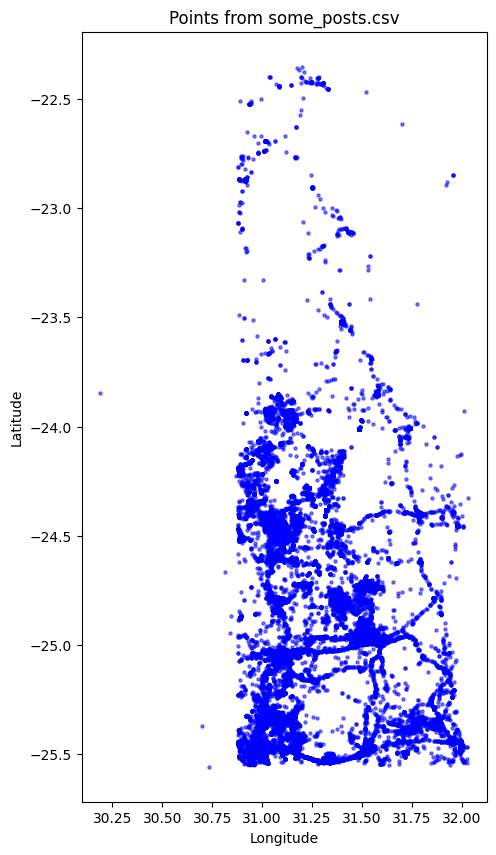

In [74]:
# Write your code here
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

file_path = 'https://raw.githubusercontent.com/Automating-GIS-processes-II-2023/Exercise-2/main/data/some_posts.csv'
data = pd.read_csv(file_path)

geometry = gpd.points_from_xy(data.lon, data.lat)
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

geo_df.set_crs(epsg=4326, inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
plt.title("Points from some_posts.csv")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
# Write your code here

### b) Add a geometry column and fill it with geometries

- Create an empty column called `geometry` where you will store shapely Point objects
- Insert Point objects into the column `geometry` based on the coordinate columns

You want to create a `shapely.geometry.Point` *for each row*, based on the columns `lon` and `lat`.
There are different approaches to this task, we encourage you to try to use the [`apply()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) of the data frame, together with a *lambda function*.

In [76]:
# Write your code here
data['geometry'] = data.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

geo_df = gpd.GeoDataFrame(data, geometry='geometry')

geo_df.set_crs(epsg=4326, inplace=True)

c:\Users\burka\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:131: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.48463 -24.98079)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.50891 -25.49922)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.93087 -24.34258)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.51972 -24.85461)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.52084 -24.92107)
...,...,...,...,...,...
81374,-24.799541,31.354469,2015-09-05 02:23,90744213,POINT (31.35447 -24.79954)
81375,-25.467992,30.956033,2015-02-05 02:40,71109799,POINT (30.95603 -25.46799)
81376,-25.332223,30.997409,2015-08-05 02:40,54796261,POINT (30.99741 -25.33222)
81377,-25.508851,31.005536,2015-08-05 02:43,78762204,POINT (31.00554 -25.50885)


In [ ]:
# Write your code here

### c) Convert the `pandas.DataFrame` into a `geopandas.GeoDataFrame`

- Convert `data` into a `geopandas.GeoDataFrame` using its [constructor](https://geopandas.org/reference/geopandas.GeoDataFrame.html).
- Make sure that the resulting `GeoDataFrame` has a coordinate reference system defined.

In [79]:
# Write your code here
data['geometry'] = data.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

geo_df = gpd.GeoDataFrame(data, geometry='geometry')

geo_df.set_crs(epsg=4326, inplace=True)

c:\Users\burka\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:131: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,lat,lon,timestamp,userid,geometry
0,-24.980792,31.484633,2015-07-07 03:02,66487960,POINT (31.48463 -24.98079)
1,-25.499225,31.508906,2015-07-07 03:18,65281761,POINT (31.50891 -25.49922)
2,-24.342578,30.930866,2015-03-07 03:38,90916112,POINT (30.93087 -24.34258)
3,-24.854614,31.519718,2015-10-07 05:04,37959089,POINT (31.51972 -24.85461)
4,-24.921069,31.520836,2015-10-07 05:19,27793716,POINT (31.52084 -24.92107)
...,...,...,...,...,...
81374,-24.799541,31.354469,2015-09-05 02:23,90744213,POINT (31.35447 -24.79954)
81375,-25.467992,30.956033,2015-02-05 02:40,71109799,POINT (30.95603 -25.46799)
81376,-25.332223,30.997409,2015-08-05 02:40,54796261,POINT (30.99741 -25.33222)
81377,-25.508851,31.005536,2015-08-05 02:43,78762204,POINT (31.00554 -25.50885)


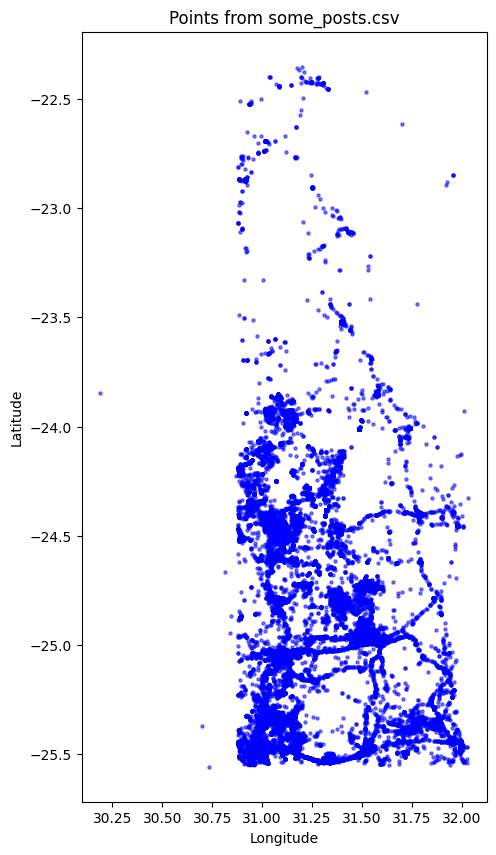

In [80]:
# Write your code here
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
plt.title("Points from some_posts.csv")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### d) Save the data in Shapefile format as `kruger_points.shp` inside the your working directory

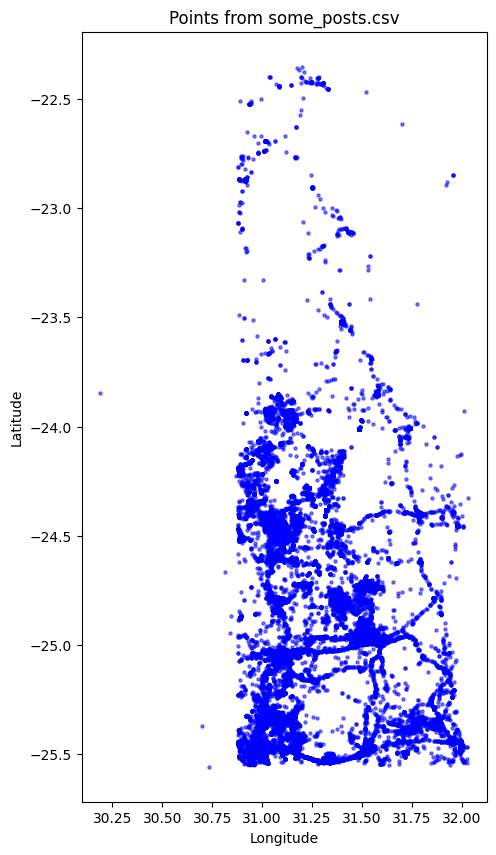

In [81]:
# Write your code here
from shapely.geometry import Point
output_file_path = 'kruger_points.shp'
geo_df.to_file(output_file_path, driver='ESRI Shapefile')

# Plot the points to verify
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
plt.title("Points from some_posts.csv")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### e) Create a simple map of the points

c:\Users\burka\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:131: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


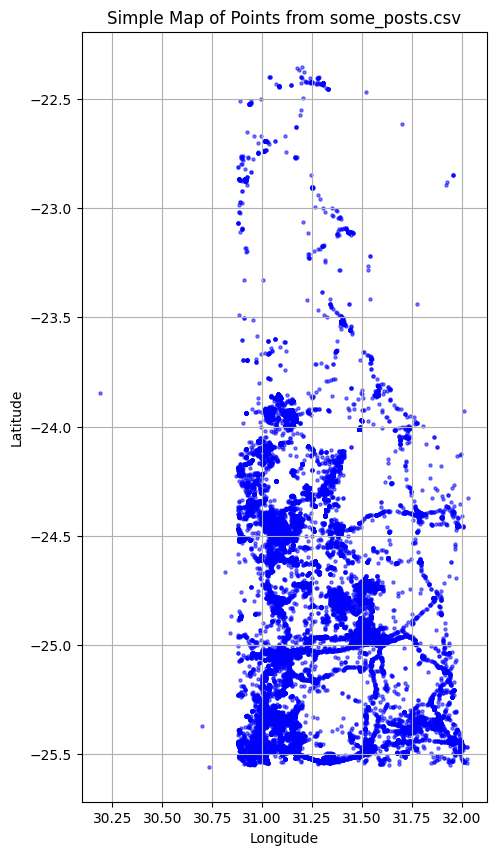

In [84]:
# Write your code here
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

file_path = 'https://raw.githubusercontent.com/Automating-GIS-processes-II-2023/Exercise-2/main/data/some_posts.csv'  # Adjust the path as needed
data = pd.read_csv(file_path)

data['geometry'] = data.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

geo_df = gpd.GeoDataFrame(data, geometry='geometry')

geo_df.set_crs(epsg=4326, inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
plt.title("Simple Map of Points from some_posts.csv")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
